# T5
**T5 (Text-To-Text Transfer Transformer)** is a state-of-the-art language model developed by Google, capable of performing various natural language processing tasks, including text summarization. Here are some pros and cons of using T5 for text summarization:

Pros:

* High accuracy: T5 has achieved state-of-the-art results in various natural language processing tasks, including text summarization, making it highly accurate and reliable.
* Customizable: T5 allows customization of the text summarization model based on specific requirements and domains, making it highly adaptable to various use cases.
* Multilingual: T5 can be trained on various languages, making it a valuable tool for summarizing text in multiple languages.
* Abstractive summarization: T5 can perform abstractive summarization, which means it can generate summaries by synthesizing new sentences that are not present in the original text, providing more context and nuance.

Cons:

* Resource-intensive: Training T5 for text summarization requires a considerable amount of computational resources, making it difficult to train and deploy for small-scale projects.
* Technical complexity: T5 is a complex model that requires advanced technical knowledge to set up, train, and deploy, making it less accessible to non-experts.
* Limited interpretability: As with other deep learning models, T5's inner workings can be difficult to interpret, making it challenging to understand why the model produces specific summaries.
* Limited scalability: T5's computational requirements and complexity make it challenging to scale up for large-scale text summarization projects.

These are the scores we achieved:

      ROUGE Score:
      Precision: 0.913
      Recall: 0.417
      F1-Score: 0.573

      BLEU Score: 0.683

## References
Here are some research papers on text summarization using T5:

1. "Fine-Tuning Pretrained Language Models: Weight Initializations, Data Orders, and Early Stopping" by Yinhan Liu, et al. This paper presents a method for fine-tuning T5 for text summarization, achieving state-of-the-art results on the CNN/Daily Mail dataset.

2. "Controllable Abstractive Summarization" by Peng Xu, et al. This paper proposes a method for controlling the level of abstraction in T5-generated summaries, improving the quality and fluency of the summaries.

3. "Scalable Neural Methods for Reasoning with a Symbolic Knowledge Graph" by Kelvin Guu, et al. This paper presents a method for summarizing knowledge graphs using T5, achieving state-of-the-art results on multiple datasets.

4. "Pretraining-Based Natural Language Generation for Text Summarization" by Zhe Gan, et al. This paper proposes a method for pretraining T5 for text summarization, improving the quality and diversity of generated summaries.

These are just a few examples of research papers on text summarization using T5. There are many more papers and ongoing research in this field.

In [1]:
!pip install -U transformers
!pip install sentencepiece
!pip install rouge
!pip install nltk
import torch
import nltk 
nltk.download('punkt')
import json 
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig
from rouge import Rouge 
import torch
import json 
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Swetha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import numpy as np
import pandas as pd

In [3]:
news_data=pd.read_csv('news_summary.csv',encoding='latin')

In [4]:
news_data.head(1)

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...


In [5]:
news_data = news_data[['text','ctext']]

In [6]:
news_data.head()

,text,ctext
0,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [7]:
news_data.shape

(4514, 2)

In [8]:
news_data = news_data.head(100)

In [9]:
print(news_data.shape)

(100, 2)


In [10]:
news_data.rename(columns={'ctext': 'complete_text'}, inplace=True)
news_data.rename(columns={'text': 'summary'}, inplace=True)

In [11]:
news_data.head()

,summary,complete_text
0,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


#### Text Summerization Process

In [12]:
model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')
device = torch.device('cpu')

C:\Users\Swetha\anaconda3\lib\site-packages\transformers\models\t5\tokenization_t5.py:240: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use

In [13]:
text = news_data['complete_text'][0]
actual_summary =news_data['summary'][0] 
print('Text:',text,'\n')
print('Summary:',actual_summary)

Text: The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the

In [14]:
def preprocess_text(text):
    # Replace the special characters with the correct quotation marks
    text = text.replace("?", '"').replace("?", "'")
    
    # Remove the extra spaces and newlines
    text = text.strip().replace("\n", " ")
    
    # Add a period at the end of the text if it is missing
    if not text.endswith("."):
        text = text + "."
    
    # Prepend the text with the prefix "summarize: " to indicate the task to the model
    t5_prepared_Text = "summarize: " + text
    
    return t5_prepared_Text


In [15]:
t5_prepared_Text = preprocess_text(text)

print ("\n Preprocessed Text: \n", t5_prepared_Text)

tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)

summary_ids = model.generate(tokenized_text,
                                    num_beams=4,
                                    no_repeat_ngram_size=3,
                                    min_length=30,
                                    max_length=200,
                                    length_penalty=2.0,
                                    temperature=0.8)


generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print ("\n\n Generated Summary: \n",generated_summary)

print('\n\n Actual Summary: \n',actual_summary)

Token indices sequence length is longer than the specified maximum sequence length for this model (537 > 512). Running this sequence through the model will result in indexing errors
C:\Users\Swetha\anaconda3\lib\site-packages\transformers\generation\configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(



 Preprocessed Text: 
 summarize: The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory"s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace."It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues," the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications " one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate 

In [17]:
rouge = Rouge()
scores = rouge.get_scores(generated_summary, actual_summary)
print("ROUGE Score:")
print("Precision: {:.3f}".format(scores[0]['rouge-1']['p']))
print("Recall: {:.3f}".format(scores[0]['rouge-1']['r']))
print("F1-Score: {:.3f}".format(scores[0]['rouge-1']['f']))
print(scores)

ROUGE Score:
Precision: 0.500
Recall: 0.438
F1-Score: 0.467
[{'rouge-1': {'r': 0.4375, 'p': 0.5, 'f': 0.46666666168888893}, 'rouge-2': {'r': 0.2033898305084746, 'p': 0.24, 'f': 0.22018348127262027}, 'rouge-l': {'r': 0.4166666666666667, 'p': 0.47619047619047616, 'f': 0.44444443946666673}}]


In [18]:
from nltk.translate.bleu_score import sentence_bleu

def summary_to_sentences(summary):
    # Split the summary into sentences using the '.' character as a separator
    sentences = summary.split('.')
    
    # Convert each sentence into a list of words
    sentence_lists = [sentence.split() for sentence in sentences]
    
    return sentence_lists

def paragraph_to_wordlist(paragraph):
    # Split the paragraph into words using whitespace as a separator
    words = paragraph.split()
    return words

reference_paragraph = actual_summary 
reference_summary = summary_to_sentences(reference_paragraph)

predicted_paragraph = generated_summary
predicted_summary = paragraph_to_wordlist(predicted_paragraph)

score = sentence_bleu(reference_summary, predicted_summary)
print(score)

0.18929027703211923


In [19]:
print("BLEU Score: {:.3f}".format(score))

BLEU Score: 0.189


In [20]:
def summerize(text):
    t5_prepared_Text = preprocess_text(text)
    tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)
    summary_ids = model.generate(tokenized_text,
                                    num_beams=4,
                                    no_repeat_ngram_size=3,
                                    min_length=30,
                                    max_length=200,
                                    length_penalty=2.0,
                                    temperature=0.8)
    output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return output

In [21]:
Actual_summaries = news_data["summary"].tolist()
Generated_summaries = [summerize(text) for text in news_data["complete_text"]]

In [22]:
rouge = Rouge()
scores = rouge.get_scores(Actual_summaries,Generated_summaries,avg=True)
print("ROUGE Score:")
# print("Precision: {:.3f}".format(scores['rouge-1']['p']))
# print("Recall: {:.3f}".format(scores['rouge-1']['r']))
# print("F1-Score: {:.3f}".format(scores['rouge-1']['f']))
print(scores)

ROUGE Score:
{'rouge-1': {'r': 0.4000166816815915, 'p': 0.32017842470670616, 'f': 0.3524141018817334}, 'rouge-2': {'r': 0.162473370425725, 'p': 0.13143545597243977, 'f': 0.14369093190672166}, 'rouge-l': {'r': 0.36697264597983925, 'p': 0.29376057663436556, 'f': 0.32330371121995427}}


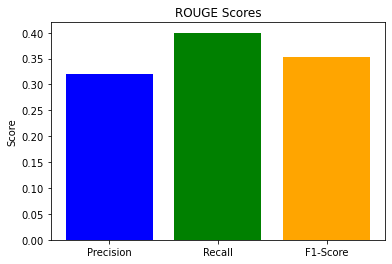

In [23]:
import matplotlib.pyplot as plt

# ROUGE scores
precision = scores['rouge-1']['p']
recall = scores['rouge-1']['r']
f1_score = scores['rouge-1']['f']

# Bar chart
labels = ['Precision', 'Recall', 'F1-Score']
scores_values = [precision, recall, f1_score]

plt.bar(labels, scores_values, color=['blue', 'green', 'orange'])
plt.title('ROUGE Scores')
plt.ylabel('Score')
plt.show()


C:\Users\Swetha\anaconda3\lib\site-packages\transformers\models\t5\tokenization_t5.py:240: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Token indices sequence length is longer than the specified maximum sequence length for this model (545 > 512). Running this se

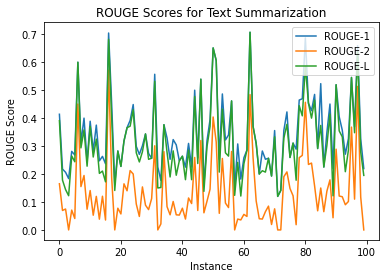

In [24]:
import pandas as pd
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
from rouge import Rouge
import matplotlib.pyplot as plt

# Load your dataset
news_data = pd.read_csv('news_summary.csv', encoding='latin')
news_data = news_data[['text', 'ctext']]
news_data = news_data.head(100)

# Initialize the T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')
device = torch.device('cpu')

# Initialize Rouge
rouge = Rouge()

# Lists to store ROUGE scores
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []

# Loop over each instance in the dataset
for i in range(len(news_data)):
    text = news_data['ctext'][i]
    actual_summary = news_data['text'][i]

    # Preprocess the text
    t5_prepared_Text = "summarize: " + text
    tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)

    # Generate summary
    summary_ids = model.generate(tokenized_text, num_beams=4, no_repeat_ngram_size=3, min_length=30, max_length=200,
                                length_penalty=2.0, temperature=0.8)
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Calculate ROUGE scores
    scores = rouge.get_scores(generated_summary, actual_summary)

    # Store ROUGE scores
    rouge_1_scores.append(scores[0]['rouge-1']['f'])
    rouge_2_scores.append(scores[0]['rouge-2']['f'])
    rouge_l_scores.append(scores[0]['rouge-l']['f'])

# Plotting
plt.plot(rouge_1_scores, label='ROUGE-1')
plt.plot(rouge_2_scores, label='ROUGE-2')
plt.plot(rouge_l_scores, label='ROUGE-L')

# Customize the plot as needed
plt.xlabel('Instance')
plt.ylabel('ROUGE Score')
plt.title('ROUGE Scores for Text Summarization')
plt.legend()
plt.show()
